In [114]:
#Dependencies
import requests
import json
from config import ow_api
import matplotlib.pyplot as plt 
from citipy import citipy
import pandas as pd 
import numpy as np 
from scipy.stats import linregress

In [115]:
#Get random coordinates
rand_lat = np.random.uniform(-90,high=90,size=(1750,1))
rand_lon = np.random.uniform(-180,high=180,size=(1750,1))
#print(rand_lat)

In [116]:
#Get list of random cities
cities = [citipy.nearest_city(rand_lat[i],rand_lon[i]) for i in range(len(rand_lat))]
city_names = [cities[i].city_name for i in range(len(cities))]
#print(city_names)

In [117]:
#Dedupe cities and make sure there are more than 500
dedupe_cities = list(dict.fromkeys(city_names))
print(len(dedupe_cities))

719


In [118]:
#Use first city to determine json structure
test_url = f"http://api.openweathermap.org/data/2.5/weather?q={dedupe_cities[0]}&appid={ow_api}&units=imperial"
response = requests.get(test_url).json()
print(json.dumps(response,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": -42.78,
        "lon": 147.06
    },
    "dt": 1599349535,
    "id": 2155415,
    "main": {
        "feels_like": 47.8,
        "humidity": 64,
        "pressure": 1020,
        "temp": 52.2,
        "temp_max": 55.99,
        "temp_min": 48.99
    },
    "name": "New Norfolk",
    "sys": {
        "country": "AU",
        "id": 2031307,
        "sunrise": 1599337782,
        "sunset": 1599378661,
        "type": 3
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 356,
        "gust": 13,
        "speed": 4
    }
}


In [119]:
#Create dataframe to hold information
citydata_df = pd.DataFrame({"Cities":dedupe_cities})

#Add columns to dataframe
citydata_df["Lat"] = ""
citydata_df["Lon"] = ""
citydata_df["Temp (F)"] = ""
citydata_df["Humidity (%)"] = ""
citydata_df["Cloudiness (%)"] = ""
citydata_df["Wind Speed (mph)"] = ""

citydata_df.head()

,Cities,Lat,Lon,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,new norfolk,,,,,,
1,tuktoyaktuk,,,,,,
2,punta arenas,,,,,,
3,hanting,,,,,,
4,rikitea,,,,,,


In [120]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?q="
api_key = f"&appid={ow_api}&units=imperial"

for index, row in citydata_df.iterrows():

    query_city = row["Cities"]
    
    query_url = f"{base_url} + {query_city} + {api_key}"

    print(f"Retrieving results for Index {index}: {query_city}...")
    response = requests.get(query_url).json()

    #results = response["results"]

    try:
        print(f"Found city {response['name']}, City ID No.: {response['id']}")

        citydata_df.loc[index, "Lat"] = response["coord"]["lat"]
        citydata_df.loc[index, "Lon"] = response["coord"]["lon"]
        citydata_df.loc[index, "Temp (F)"] = response["main"]["temp"]
        citydata_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        citydata_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        citydata_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
    except (KeyError,IndexError):
        print(f"Missing field/result ... skipping ...")
    
    print("-------------")

---------
Retrieving results for Index 522: mujiayingzi...
Found city Mujiayingzi, City ID No.: 2035707
-------------
Retrieving results for Index 523: borgo san dalmazzo...
Found city Borgo San Dalmazzo, City ID No.: 3181757
-------------
Retrieving results for Index 524: vaxjo...
Missing field/result ... skipping ...
-------------
Retrieving results for Index 525: louis trichardt...
Found city Louis Trichardt, City ID No.: 981827
-------------
Retrieving results for Index 526: lujan...
Found city Lujan, City ID No.: 3430988
-------------
Retrieving results for Index 527: salmon creek...
Found city Salmon Creek, City ID No.: 5809333
-------------
Retrieving results for Index 528: warrington...
Found city Warrington, City ID No.: 2634739
-------------
Retrieving results for Index 529: vao...
Found city Vao, City ID No.: 2137773
-------------
Retrieving results for Index 530: vardo...
Found city Vardo, City ID No.: 777019
-------------
Retrieving results for Index 531: brunico...
Found 

In [121]:
#confirm that this returned at least 500 good results
citydata_df["Lat"].replace('',np.nan,inplace=True)
citydata_df.dropna(axis=0,how="any",inplace=True)
citydata_df.count()

Cities              631
Lat                 631
Lon                 631
Temp (F)            631
Humidity (%)        631
Cloudiness (%)      631
Wind Speed (mph)    631
dtype: int64

In [131]:
#Write to csv
citydata_df.to_csv("Results/WeatherPy/citydata.csv")

# Analysis: All Latitudes

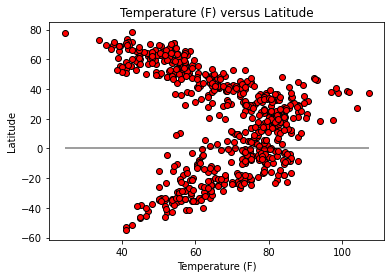

<Figure size 432x288 with 0 Axes>

In [122]:
x_axis = citydata_df["Temp (F)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="red")

plt.title("Temperature (F) versus Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/temp_vs_lat.png")

### Temperature (F) versus Latitude
The trend shows that as locations get closer to the equator (Latitude = 0), the temperatures go up. As the locations go farther away from the equator, temperatures drop.

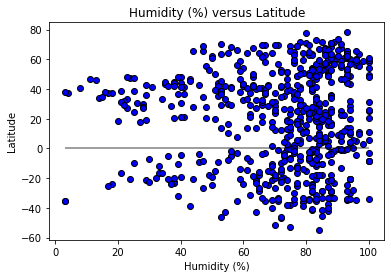

<Figure size 432x288 with 0 Axes>

In [123]:
x_axis = citydata_df["Humidity (%)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="blue")

plt.title("Humidity (%) versus Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/hum_vs_lat.png")

### Humidity (%) versus Latitude
There does not appear to be a strong correlation between the percent humidity and the latitude.

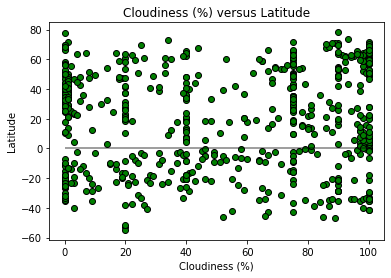

<Figure size 432x288 with 0 Axes>

In [124]:
x_axis = citydata_df["Cloudiness (%)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="green")

plt.title("Cloudiness (%) versus Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/cld_vs_lat.png")

### Cloudiness (%) versus Latitude

There does not appear to be a strong correlation between percent cloudiness and the latitude.

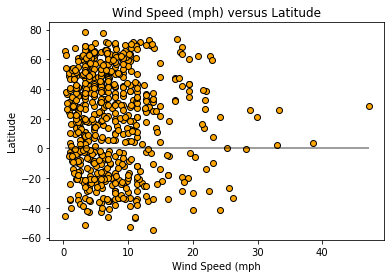

<Figure size 432x288 with 0 Axes>

In [125]:
x_axis = citydata_df["Wind Speed (mph)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="orange")

plt.title("Wind Speed (mph) versus Latitude")
plt.xlabel("Wind Speed (mph")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/ws_vs_lat.png")

### Wind Speed (mph) versus Latitude
There does not appear to be a correlation between wind speed and the latitude of the location.

# Analysis: Northern vs. Southern Hemisphere

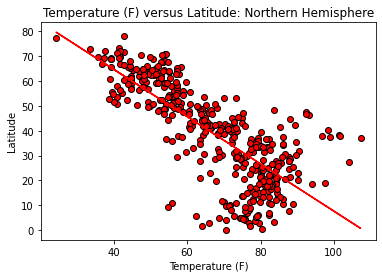

<Figure size 432x288 with 0 Axes>

In [130]:
n_hemi = citydata_df.loc[(citydata_df["Lat"] > 0)]

x_axis = n_hemi["Temp (F)"]
y_axis = n_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis,edgecolors="black",color="red")
plt.plot(x_axis,regress_values,"r-")

plt.title("Temperature (F) versus Latitude: Northern Hemisphere")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.show()
plt.savefig("Results/WeatherPy/n_temp_vs_lat.png")